# Introduction to Natural Language Processing


### Outline
#### 1. Watson on Jeopardy video? Explanation of QA systems on Youtube?

    1a. Pick something out:
        https://www.youtube.com/watch?v=_Xcmh1LQB9I
        https://www.youtube.com/watch?v=ZPXCF5e1_HI
        
#### 2. Basic NLP tasks using the Reuters Corpus

    2a. Word Frequencies and Dispersion Plots       
    2b. Word Concordances, Collocations, and Similarities
    
#### 3. Transforming Raw Text/Unstructured Data into Features/Structured Data.

    cf. Box 1 of [1]; Chapter 7 of the NLTK book [3]

    a. Boundary Detection
    b. Tokenization
    c. Normalization  ??Stemming/Lemmatization??
    d. Part-of-speech tagging
    e. Shallow Parsing
    f. Entity Recognition    
    g. Explanations - What is going on under the hood?
        i. Training/Testing

#### 4. Relation Extraction

??Regular Expressions??
cf. Book, Sect. 7.6

#### 5. Patient-level and Document-level classification

#### 6. Topic Modeling
    5a. LDA, Reference [2]
    

### Outline

TODO. The future
1. IBM's Watson on Jeopardy and Question Answering Systems
2. Spoken Dialogue Systems

TODO. Challenges
1. WSD - Word sense disambiguation for homonyms.
    "Serve" has several senses: give food or drink; hold office; put ball into play
    In clinical domain, "pt" may stand for patient; prothrombin time; physical therapist
2. Pronoun/Coreference Resolution
    
### References

[1] Nature Reviews

[2] Deep Patient

[3] Bird, S., Klein, E., Loper, E. ``Natural Language Processing with Python'' O'Reilly

## 1. Section


## 2. Basic NLP tasks using the Reuters Corpus

**DEF.** A *corpus* is a collection of documents that we mine or retrieve information from.

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test".

### 2a. Word Frequencies and Dispersion Plots

In [1]:
# Get Reuters Corpus
from nltk.corpus import reuters

# Overview of Corpus
print 'The Reuters corpus has documents with multiple categories: '
print reuters.categories()[:13]
print 'etc.'
 
print 'A total of ', len(reuters.fileids()), ' training and test documents.'

The Reuters corpus has documents with multiple categories: 
[u'acq', u'alum', u'barley', u'bop', u'carcass', u'castor-oil', u'cocoa', u'coconut', u'coconut-oil', u'coffee', u'copper', u'copra-cake', u'corn']
etc.
A total of  10788  training and test documents.


In [2]:
# Look at particular document in corpus;
# specifically a document with the coffee category
docid = reuters.fileids(categories='coffee')[0] # a coffee-related document
print docid

# Print the raw text of the document
raw_text = reuters.raw(docid)
print raw_text[:100]

# Print other categories the document belongs to
print '\nOther categories in this document:\n', reuters.categories(docid)

test/14840
INDONESIAN COMMODITY EXCHANGE MAY EXPAND
  The Indonesian Commodity Exchange is
  likely to start tr

Other categories in this document:
[u'coffee', u'lumber', u'palm-oil', u'rubber', u'veg-oil']


[u'INDONESIAN', u'COMMODITY', u'EXCHANGE', u'MAY', u'EXPAND', u'The', u'Indonesian', u'Commodity', u'Exchange', u'is', u'likely', u'to', u'start', u'trading', u'in', u'at', u'least', u'one', u'new', u'commodity']
Number of times coffee occurs =  5


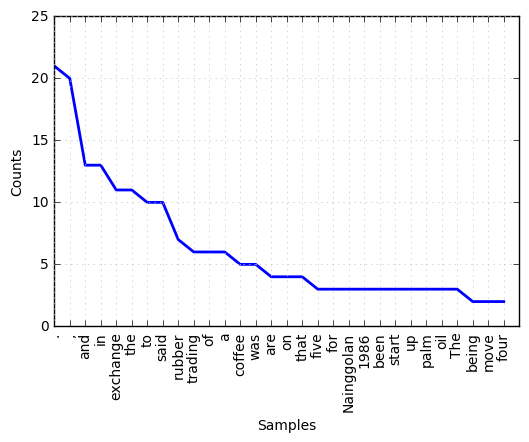

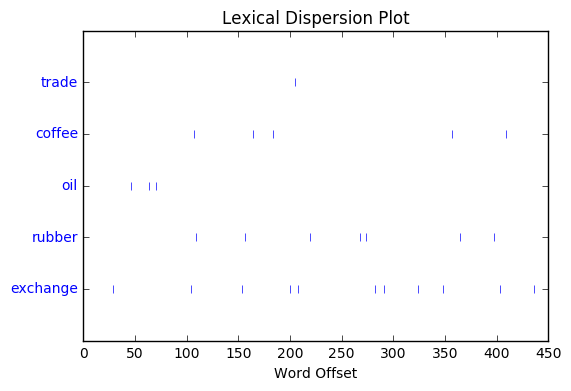

In [3]:
import nltk

# Look at tokens in the document
w = reuters.words(docid)
print w[:20]

# 
x = nltk.Text(w)

from nltk import FreqDist
fdist = FreqDist(x)
print 'Number of times coffee occurs = ', fdist['coffee']
fdist.plot(30)  # Frequency plot of tokens

x.dispersion_plot(['trade','coffee','oil','rubber','exchange'])

In [ ]:
# Now get large collection of documents
x = nltk.Text(nltk.corpus.reuters.words(categories=['trade','coffee']))
x.dispersion_plot(['trade','coffee','oil','rubber','exchange'])

### 2b. Word Concordances, Collocations, and Similarities

DEF. A *collocation* is a sequence of words that occur together unusually often; e.g. "hip replacement", "emergency room"

In [ ]:
x.concordance('coffee',lines=5,width=80)

# similarity test
print '\nTokens similar to \'fell\':\n'
x.similar('fell')

print '\nTokens similar to \'economy\':\n'
x.similar('economy')

print '\nCommon contexts for \'oil\' and \'coffee\':\n'
x.common_contexts(['oil','coffee'])

print '\nCollocations:\n'
x.collocations(num=10,window_size=3)

## 3. Transforming Raw Text/Unstructured Data into Features/Structured Data.
cf. Reference [1]; Chapter 7 of [3]

TODO. Word sense disambiguation for homonyms.
"Serve" has several senses: give food or drink; hold office; put ball into play
In clinical domain, "pt" may stand for patient; prothrombin time; physical therapist


Check Part-of-Speech Tagger

Nature Reviews Article, Box 1
1. Boundary Detection
2. Tokenization
3. Normalization
4. Part-of-speech tagging
5. Shallow Parsing
6. Entity Recognition

See NLTK book, Chapter 7

### 3a. Sentence and Word Segmentation, Tokenization

**DEF.** A *token* is the technical name for a sequence of characters, e.g. "sugery", "hip", "ward", that we want to treat as a group. 

In [36]:
# Make up some text
text = r'Was the tabby cat with the Ph.D. lying on the mat? [yes] no. \r\n'
print text

# Segment the sentences
sents = nltk.sent_tokenize(text)
print sents

Was the tabby cat with the Ph.D. lying on the mat? [yes] no. \r\n
['Was the tabby cat with the Ph.D. lying on the mat?', '[yes] no.', '\\r\\n']


In [37]:
# Segment the words in the first sentence.
sent = sents[0]

# Tokenizer 1
tokens = nltk.word_tokenize(sent)
print tokens
# help(nltk.word_tokenize)
# help(nltk.tokenize.TreebankWordTokenizer)

# Tokenizer 2
tokens2 = nltk.wordpunct_tokenize(sent)
print tokens2

['Was', 'the', 'tabby', 'cat', 'with', 'the', 'Ph.D.', 'lying', 'on', 'the', 'mat', '?']
['Was', 'the', 'tabby', 'cat', 'with', 'the', 'Ph', '.', 'D', '.', 'lying', 'on', 'the', 'mat', '?']


**Note**: To apply the NLTK basic tasks from Section 2, just create an NLTK text object using the tokenized text: 
text = nltk.Text(tokens)

### 3b. Normalization and Stemming

**DEF.** One usually *normalizes* text to lowercase so that the distinction
between "The" and "the" is ignored.

**DEF.** The *vocabulary* of a text is the set of (normalized) tokens that it uses.

In [39]:
# Normalize the tokens
normalized_tokens = [t.lower() for t in tokens]
print '\nNormalized tokens:\n', normalized_tokens

# Build the vocabulary
vocabulary = sorted(set(normalized_tokens))
print '\nThe vocabulary:\n', vocabulary


Normalized tokens:
['was', 'the', 'tabby', 'cat', 'with', 'the', 'ph.d.', 'lying', 'on', 'the', 'mat', '?']

The vocabulary:
['?', 'cat', 'lying', 'mat', 'on', 'ph.d.', 'tabby', 'the', 'was', 'with']


**DEF.** A next possible step is to *stem* the text by stripping off any affixes.

**DEF.** A *lexicon* is a collection of words and/or phrases along with 
associated information, such as part-of-speech and sense definitions.
A lexical entry consists of a *lemma* along with additional information.
The step of mapping tokens, normalized tokens, or stemmed tokens
to lemmas is called *lemmatization*.

In [40]:
# Apply two different stemmers
print [nltk.PorterStemmer().stem(t) for t in normalized_tokens]
print [nltk.LancasterStemmer().stem(t) for t in normalized_tokens]

[u'wa', u'the', u'tabbi', u'cat', u'with', u'the', u'ph.d.', u'lie', u'on', u'the', u'mat', u'?']
['was', 'the', 'tabby', 'cat', 'with', 'the', 'ph.d.', 'lying', 'on', 'the', 'mat', '?']


In [41]:
# A stemming test
example_tokens = ['lie', 'lied', 'lay', 'lies', 'lying', 'fall', 'fell', 'falling', 'falls', 'falled']
print [nltk.PorterStemmer().stem(t) for t in example_tokens]
print [nltk.LancasterStemmer().stem(t) for t in example_tokens]

[u'lie', u'lie', u'lay', u'lie', u'lie', u'fall', u'fell', u'fall', u'fall', u'fall']
['lie', 'lied', 'lay', 'lie', 'lying', 'fal', 'fel', 'fal', 'fal', 'fal']


### 3c. POS Tagging

Tagging each token with its part of speech is useful for other tasks in natural language processing, such as named entity recognition and relation extraction.

In [46]:
post_tokens = nltk.pos_tag(tokens)
print post_tokens

[('Was', 'VBD'), ('the', 'DT'), ('tabby', 'JJ'), ('cat', 'NN'), ('with', 'IN'), ('the', 'DT'), ('Ph.D.', 'NNP'), ('lying', 'NN'), ('on', 'IN'), ('the', 'DT'), ('mat', 'NN'), ('?', '.')]


In [44]:
# What do the tags mean?
print nltk.help.upenn_tagset('JJ')

JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
None


### 3d. Named Entity Recognition (NER)

**TODO** DEF. A named entity is

**TODO** Example. UMLS concepts

In [49]:
print nltk.ne_chunk(post_tokens)

(S
  Was/VBD
  the/DT
  tabby/JJ
  cat/NN
  with/IN
  the/DT
  Ph.D./NNP
  lying/NN
  on/IN
  the/DT
  mat/NN
  ?/.)


## 4. Relation Extraction
cf. Book, Sect. 7.6


In [53]:
text = nltk.corpus.reuters.raw(categories=['trade','coffee'])
tokens = nltk.word_tokenize(text)
post_tokens = nltk.pos_tag(tokens)
ner_post_tokens = nltk.ne_chunk(post_tokens)

[(u'ASIAN', 'NNP'), (u'EXPORTERS', 'NNP'), (u'FEAR', 'NNP'), (u'DAMAGE', 'NNP'), (u'FROM', 'NNP'), (u'U.S.-JAPAN', 'NNP'), (u'RIFT', 'NNP'), (u'Mounting', 'NNP'), (u'trade', 'NN'), (u'friction', 'NN'), (u'between', 'IN'), (u'the', 'DT'), (u'U.S.', 'NNP'), (u'And', 'CC'), (u'Japan', 'NNP'), (u'has', 'VBZ'), (u'raised', 'VBN'), (u'fears', 'NNS'), (u'among', 'IN'), (u'many', 'JJ')]
[Tree('GPE', [(u'ASIAN', 'NNP')]), Tree('ORGANIZATION', [(u'EXPORTERS', 'NNP')]), (u'FEAR', 'NNP'), (u'DAMAGE', 'NNP'), (u'FROM', 'NNP'), (u'U.S.-JAPAN', 'NNP'), (u'RIFT', 'NNP'), (u'Mounting', 'NNP'), (u'trade', 'NN'), (u'friction', 'NN'), (u'between', 'IN'), (u'the', 'DT'), Tree('GPE', [(u'U.S.', 'NNP')]), (u'And', 'CC'), Tree('GPE', [(u'Japan', 'NNP')]), (u'has', 'VBZ'), (u'raised', 'VBN'), (u'fears', 'NNS'), (u'among', 'IN'), (u'many', 'JJ')]


In [62]:
for i, item in enumerate(ner_post_tokens):
    print item
    if i > 12:
        break    

(GPE ASIAN/NNP)
(ORGANIZATION EXPORTERS/NNP)
(u'FEAR', 'NNP')
(u'DAMAGE', 'NNP')
(u'FROM', 'NNP')
(u'U.S.-JAPAN', 'NNP')
(u'RIFT', 'NNP')
(u'Mounting', 'NNP')
(u'trade', 'NN')
(u'friction', 'NN')
(u'between', 'IN')
(u'the', 'DT')
(GPE U.S./NNP)
(u'And', 'CC')


In [58]:
import re
RE = re.compile(r'.*in')
v = nltk.sem.extract_rels('ORGANIZATION', 'GPE', ner_post_tokens, pattern = RE)

In [61]:
for rel in v:
    # print nltk.sem.show_raw_rtuple(rel)
    print rel

defaultdict(<type 'str'>, {'lcon': '', 'untagged_filler': u'FEAR DAMAGE FROM U.S.-JAPAN RIFT Mounting trade friction between the', 'filler': u'FEAR/NNP DAMAGE/NNP FROM/NNP U.S.-JAPAN/NNP RIFT/NNP Mounting/NNP trade/NN friction/NN between/IN the/DT', 'objsym': u'us', 'objclass': 'GPE', 'objtext': u'U.S./NNP', 'subjsym': u'exporters', 'subjclass': 'ORGANIZATION', 'rcon': u'And/CC', 'subjtext': u'EXPORTERS/NNP'})
defaultdict(<type 'str'>, {'lcon': u'officials/NNS said/VBD ./. They/PRP told/VBD', 'untagged_filler': u'correspondents in', 'filler': u'correspondents/NNS in/IN', 'objsym': u'asian', 'objclass': 'GPE', 'objtext': u'Asian/JJ', 'subjsym': u'reuter', 'subjclass': 'ORGANIZATION', 'rcon': u'capitals/NNS a/DT', 'subjtext': u'Reuter/NNP'})
defaultdict(<type 'str'>, {'lcon': u"'s/POS ruling/VBG", 'untagged_filler': u'yesterday outlined a package of economic measures to boost the', 'filler': u'yesterday/NN outlined/VBD a/DT package/NN of/IN economic/JJ measures/NNS to/TO boost/VB the/DT'

## X. Topic Modeling with LDA

[u'INDONESIAN', u'COMMODITY', u'EXCHANGE', u'MAY', u'EXPAND', u'The', u'Indonesian', u'Commodity', u'Exchange', u'is', u'likely', u'to', u'start', u'trading', u'in', u'at', u'least', u'one', u'new', u'commodity', u',', u'and', u'possibly', u'two', u',', u'during', u'calendar', u'1987', u',', u'exchange']
          barley petroleum    brazil  nitrates  moisture   weather 
coffee         2         5       175         0         0        10 
  corn        58         0        18         0        16        36 
 wheat        94         2        17         0        16        65 


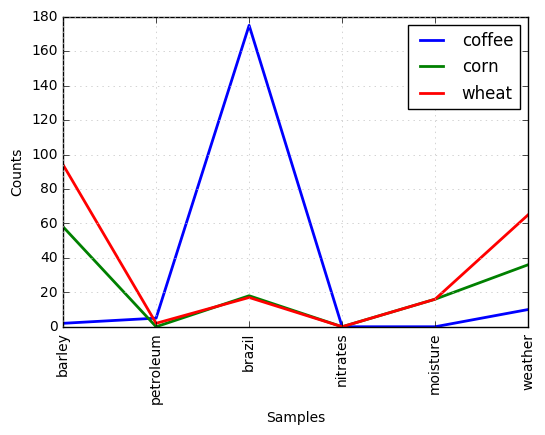

In [4]:
# LDA and such
print reuters.words(categories='coffee')[:30]

cfd = nltk.ConditionalFreqDist((category, word.lower())
                                for category in ['coffee', 'corn', 'wheat']
                                for word in reuters.words(categories=category))

cfd.tabulate(samples=['barley','petroleum','brazil','nitrates','moisture','weather'])
cfd.plot(samples=['barley','petroleum','brazil','nitrates','moisture','weather'])